In [1]:
import os
import glob
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from quickstats.utils.data_conversion import root2array
from itertools import combinations, permutations

In [2]:
directorytJ = "/eos/user/x/xianglon/ttHCP/hdf5/true_jets"

filestJ_mc16d = glob.glob(os.path.join(directorytJ, "mc16d*.h5"))
filestJ_mc16a = glob.glob(os.path.join(directorytJ, "mc16a*00[1-5]*.h5"))
filestJ_mc16test = glob.glob(os.path.join(directorytJ, "*031*.h5"))

filestJ = filestJ_mc16a

df_tJ = pd.DataFrame()
current_max_event_id = 0

for file in filestJ:
    print(f"Processing file: {file}")
    df_tJ_piece = pd.read_hdf(file, key='df')
    df_tJ_piece['event'] += current_max_event_id
    current_max_event_id = df_tJ_piece['event'].max() + 1
    
    df_tJ = pd.concat([df_tJ, df_tJ_piece], ignore_index=True)

df_tJ = df_tJ.reset_index(drop=True)
df_tJ['jet_index'] = df_tJ.groupby('event').cumcount()

df_tJ = df_tJ[(df_tJ['HGamAntiKt4TruthWZJetsAuxDyn.eta'] > -2.5) & (df_tJ['HGamAntiKt4TruthWZJetsAuxDyn.eta'] < 2.5) & (df_tJ['HGamAntiKt4TruthWZJetsAuxDyn.pt'] > 25)]

Processing file: /eos/user/x/xianglon/ttHCP/hdf5/true_jets/mc16a.PowhegPy8_ttH125_fixweight.MxAODDetailedNoSkim.e7488_s3126_r9364_p4180_h028.001.h5
Processing file: /eos/user/x/xianglon/ttHCP/hdf5/true_jets/mc16a.PowhegPy8_ttH125_fixweight.MxAODDetailedNoSkim.e7488_s3126_r9364_p4180_h028.002.h5
Processing file: /eos/user/x/xianglon/ttHCP/hdf5/true_jets/mc16a.PowhegPy8_ttH125_fixweight.MxAODDetailedNoSkim.e7488_s3126_r9364_p4180_h028.003.h5
Processing file: /eos/user/x/xianglon/ttHCP/hdf5/true_jets/mc16a.PowhegPy8_ttH125_fixweight.MxAODDetailedNoSkim.e7488_s3126_r9364_p4180_h028.004.h5
Processing file: /eos/user/x/xianglon/ttHCP/hdf5/true_jets/mc16a.PowhegPy8_ttH125_fixweight.MxAODDetailedNoSkim.e7488_s3126_r9364_p4180_h028.005.h5


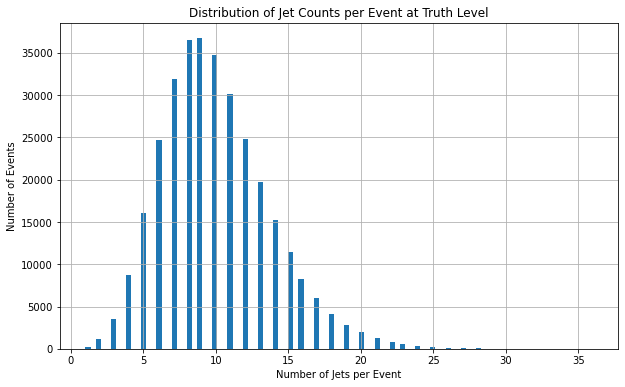

In [3]:
# Count the number of jets per event
jet_counts = df_tJ.groupby('event').size()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(jet_counts, bins=100)
plt.xlabel('Number of Jets per Event')
plt.ylabel('Number of Events')
plt.title('Distribution of Jet Counts per Event at Truth Level')
plt.grid(True)
plt.show()

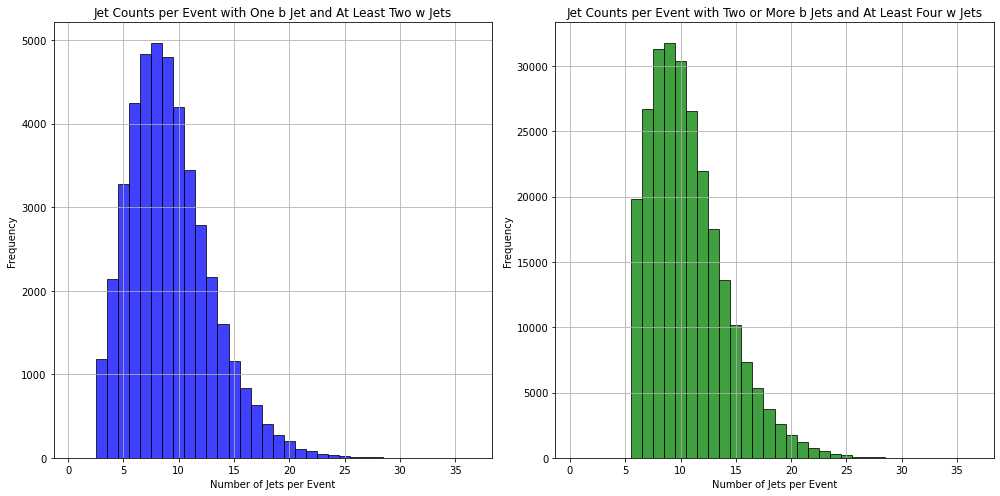

One b jet and at least two w jets event counts:
3     1178
4     2140
5     3272
6     4247
7     4828
8     4964
9     4800
10    4202
11    3447
12    2781
13    2159
14    1607
15    1163
16     832
17     631
18     402
19     273
20     201
21     111
22      78
23      45
24      30
25      19
26      14
27      10
28       5
30       1
31       2
36       1
Name: total_jets, dtype: int64

Two or more b jets and at least four w jets event counts:
6     19793
7     26746
8     31336
9     31755
10    30384
11    26522
12    21988
13    17498
14    13592
15    10205
16     7353
17     5381
18     3737
19     2563
20     1736
21     1191
22      778
23      487
24      312
25      193
26       90
27       75
28       38
29       17
30       15
31        6
32        1
33        2
36        1
Name: total_jets, dtype: int64


In [4]:
def count_jets(group):
    b_jets = group['HGamAntiKt4TruthWZJetsAuxDyn.HadronConeExclTruthLabelID'] == 5
    w_jets = group['HGamAntiKt4TruthWZJetsAuxDyn.HadronConeExclTruthLabelID'] != 5
    return pd.Series({
        'b_jets': b_jets.sum(),
        'w_jets': w_jets.sum(),
        'total_jets': len(group)
    })

jet_counts = df_tJ.groupby('event').apply(count_jets)

one_b_two_w_events = jet_counts[(jet_counts['b_jets'] == 1) & (jet_counts['w_jets'] >= 2)]
two_b_four_w_events = jet_counts[(jet_counts['b_jets'] >= 2) & (jet_counts['w_jets'] >= 4)]

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(one_b_two_w_events['total_jets'], bins=np.arange(0.5, one_b_two_w_events['total_jets'].max() + 1.5), alpha=0.75, color='blue', edgecolor='black')
plt.title('Jet Counts per Event with One b Jet and At Least Two w Jets')
plt.xlabel('Number of Jets per Event')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(two_b_four_w_events['total_jets'], bins=np.arange(0.5, two_b_four_w_events['total_jets'].max() + 1.5), alpha=0.75, color='green', edgecolor='black')
plt.title('Jet Counts per Event with Two or More b Jets and At Least Four w Jets')
plt.xlabel('Number of Jets per Event')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

print("One b jet and at least two w jets event counts:")
print(one_b_two_w_events['total_jets'].value_counts().sort_index())

print("\nTwo or more b jets and at least four w jets event counts:")
print(two_b_four_w_events['total_jets'].value_counts().sort_index())

In [5]:
num_events_one_b_two_w = len(one_b_two_w_events)
num_events_two_b_four_w = len(two_b_four_w_events)

print(f"Total number of events with one b jet and at least two w jets: {num_events_one_b_two_w}")
print(f"Total number of events with two or more b jets and at least four w jets: {num_events_two_b_four_w}")

Total number of events with one b jet and at least two w jets: 43443
Total number of events with two or more b jets and at least four w jets: 253795


In [ ]:
def calculate_invariant_mass(px, py, pz, energy):
    mass2 = energy**2 - (px**2 + py**2 + pz**2)
    return np.sqrt(mass2) if mass2 >= 0 else 0

def calculate_kinematics(pt, eta, phi, mass):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    energy = np.sqrt(px**2 + py**2 + pz**2 + mass**2)
    return px, py, pz, energy

def chi2(top_mass, W_mass, top_width, W_width, bjet, wjets):
    b_px, b_py, b_pz, b_energy = calculate_kinematics(
        bjet['HGamAntiKt4TruthWZJetsAuxDyn.pt'], bjet['HGamAntiKt4TruthWZJetsAuxDyn.eta'],
        bjet['HGamAntiKt4TruthWZJetsAuxDyn.phi'], bjet['HGamAntiKt4TruthWZJetsAuxDyn.m'])
    w1_px, w1_py, w1_pz, w1_energy = calculate_kinematics(
        wjets.iloc[0]['HGamAntiKt4TruthWZJetsAuxDyn.pt'], wjets.iloc[0]['HGamAntiKt4TruthWZJetsAuxDyn.eta'],
        wjets.iloc[0]['HGamAntiKt4TruthWZJetsAuxDyn.phi'], wjets.iloc[0]['HGamAntiKt4TruthWZJetsAuxDyn.m'])
    w2_px, w2_py, w2_pz, w2_energy = calculate_kinematics(
        wjets.iloc[1]['HGamAntiKt4TruthWZJetsAuxDyn.pt'], wjets.iloc[1]['HGamAntiKt4TruthWZJetsAuxDyn.eta'],
        wjets.iloc[1]['HGamAntiKt4TruthWZJetsAuxDyn.phi'], wjets.iloc[1]['HGamAntiKt4TruthWZJetsAuxDyn.m'])
    # m_{bq_1q_2}
    total_px = b_px + w1_px + w2_px
    total_py = b_py + w1_py + w2_py
    total_pz = b_pz + w1_pz + w2_pz
    total_energy = b_energy + w1_energy + w2_energy
    top_mass_calculated = calculate_invariant_mass(total_px, total_py, total_pz, total_energy)
    # m_{q_1q_2}
    w_mass_calculated = calculate_invariant_mass(
        w1_px + w2_px, w1_py + w2_py, w1_pz + w2_pz, w1_energy + w2_energy)
    # chi2
    chi2_top = ((top_mass_calculated - top_mass) / top_width) ** 2
    chi2_W = ((w_mass_calculated - W_mass) / W_width) ** 2
    return chi2_top + chi2_W

top_mass = 169800
W_mass = 81000
top_width = 29000
W_width = 18500

best_triplets = []

for event_id, group in df_tJ.groupby('event'):
    bjets = group[group['HGamAntiKt4TruthWZJetsAuxDyn.HadronConeExclTruthLabelID'] == 5]
    wjets = group[group['HGamAntiKt4TruthWZJetsAuxDyn.HadronConeExclTruthLabelID'] != 5]
    
    num_bjets = len(bjets)
    num_wjets = len(wjets)
    
    if num_bjets >= 2 and num_wjets >= 4:
        triplet_candidates = []
        for bjet_idx in bjets.index:
            for wjet_pair in combinations(wjets.index, 2):
                triplet = {'bjet_idx': bjet_idx, 'wjet_indices': wjet_pair}
                triplet_candidates.append(triplet)
        chi2_list = []
        for triplet in triplet_candidates:
            bjet = bjets.loc[triplet['bjet_idx']]
            wjets_pair = wjets.loc[list(triplet['wjet_indices'])].reset_index(drop=True)
            chi2_value = chi2(top_mass, W_mass, top_width, W_width, bjet, wjets_pair)
            chi2_list.append({'chi2': chi2_value, 'triplet': triplet})
        chi2_list.sort(key=lambda x: x['chi2'])
        selected_triplets = []
        used_wjets = set()
        for item in chi2_list:
            triplet = item['triplet']
            wjet_indices = set(triplet['wjet_indices'])
            if not wjet_indices & used_wjets:
                selected_triplets.append(triplet)
                used_wjets.update(wjet_indices)
            if len(selected_triplets) == 2:
                break
        if len(selected_triplets) == 2:
            labels = [1, 2]
            for triplet, label in zip(selected_triplets, labels):
                bjet = bjets.loc[triplet['bjet_idx']].copy()
                wjets_pair = wjets.loc[list(triplet['wjet_indices'])].copy()
                bjet['label'] = label
                wjets_pair['label'] = label
                combined_triplet = pd.concat([bjet.to_frame().T, wjets_pair], ignore_index=True)
                best_triplets.append(combined_triplet)
    elif num_bjets == 1 and num_wjets >= 2:
        triplet_candidates = []
        bjet_idx = bjets.index[0]
        for wjet_pair in combinations(wjets.index, 2):
            triplet = {'bjet_idx': bjet_idx, 'wjet_indices': wjet_pair}
            triplet_candidates.append(triplet)
        chi2_list = []
        for triplet in triplet_candidates:
            bjet = bjets.loc[triplet['bjet_idx']]
            wjets_pair = wjets.loc[list(triplet['wjet_indices'])].reset_index(drop=True)
            chi2_value = chi2(top_mass, W_mass, top_width, W_width, bjet, wjets_pair)
            chi2_list.append({'chi2': chi2_value, 'triplet': triplet})
        chi2_list.sort(key=lambda x: x['chi2'])
        best_triplet = chi2_list[0]['triplet']
        bjet = bjets.loc[best_triplet['bjet_idx']].copy()
        wjets_pair = wjets.loc[list(best_triplet['wjet_indices'])].copy()
        bjet['label'] = 1
        wjets_pair['label'] = 1
        combined_triplet = pd.concat([bjet.to_frame().T, wjets_pair], ignore_index=True)
        best_triplets.append(combined_triplet)
    else:
        continue

if best_triplets:
    triplets_df = pd.concat(best_triplets, ignore_index=True)
else:
    triplets_df = pd.DataFrame()

df_tJ['label'] = 0

label_dict = {}

for idx, row in triplets_df.iterrows():
    event_id = row['event']
    jet_idx = row['jet_index']
    label = row['label']
    label_dict[(event_id, jet_idx)] = label

df_tJ.set_index(['event', 'jet_index'], inplace=True)

df_tJ['label'] = df_tJ.index.map(label_dict).fillna(0).astype(int)

df_tJ.reset_index(inplace=True)

In [ ]:
df_tJ

In [ ]:
df_tJ[df_tJ['label'] == 1]

In [ ]:
df_tJ[df_tJ['label'] == 2]

In [ ]:
directoryrJ = "/eos/user/x/xianglon/ttHCP/hdf5/reco_jets"

filesrJ_mc16d = glob.glob(os.path.join(directoryrJ, "mc16d*rJ.h5"))
filesrJ_mc16a = glob.glob(os.path.join(directoryrJ, "mc16a*00[1-5]*.h5"))
filesrJ_mc16test = glob.glob(os.path.join(directoryrJ, "*031*rJ.h5"))

filesrJ = filesrJ_mc16a

df_rJ = pd.DataFrame()
current_max_event_id = 0

for file in filesrJ:
    print(f"Processing file: {file}")
    df_rJ_piece = pd.read_hdf(file, key='df')
    df_rJ_piece['event'] += current_max_event_id
    current_max_event_id = df_rJ_piece['event'].max() + 1
    
    df_rJ = pd.concat([df_rJ, df_rJ_piece], ignore_index=True)

df_rJ = df_rJ.reset_index(drop=True)
df_rJ['jet_index'] = df_rJ.groupby('event').cumcount()
df_rJ = df_rJ[(df_rJ['HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.eta'] > -2.5) & (df_rJ['HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.eta'] < 2.5) & (df_rJ['HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.pt'] > 25)]

In [ ]:
# Count the number of jets per event
jet_counts_rJ = df_rJ.groupby('event').size()

plt.figure(figsize=(10, 6))
plt.hist(jet_counts_rJ, bins=28)
plt.xlabel('Number of Jets per Event')
plt.ylabel('Number of Events')
plt.title('Distribution of Jet Counts per Event at Reco Level')
plt.grid(True)
plt.show()

In [ ]:
def delta_R(eta1, phi1, eta2, phi2):
    eta1 = np.asarray(eta1, dtype=np.float64)
    phi1 = np.asarray(phi1, dtype=np.float64)
    eta2 = np.asarray(eta2, dtype=np.float64)
    phi2 = np.asarray(phi2, dtype=np.float64)

    dphi = np.abs(phi1[:, np.newaxis] - phi2)
    dphi = np.mod(dphi, 2 * np.pi)
    dphi = np.minimum(dphi, 2 * np.pi - dphi)

    deta = eta1[:, np.newaxis] - eta2

    return np.sqrt(deta**2 + dphi**2)

In [ ]:
# 匈牙利算法!!!!!!!!!
from scipy.optimize import linear_sum_assignment
df_rJ['label'] = 0

truth_label_dict = triplets_df.set_index(['event', 'jet_index'])['label'].to_dict()

for event_id, reco_group in df_rJ.groupby('event'):
    reco_indices = reco_group['jet_index'].values
    reco_etas = reco_group['HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.eta'].values
    reco_phis = reco_group['HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.phi'].values

    truth_group = df_tJ[df_tJ['event'] == event_id]
    if not truth_group.empty:
        truth_indices = truth_group['jet_index'].values
        truth_etas = truth_group['HGamAntiKt4TruthWZJetsAuxDyn.eta'].values
        truth_phis = truth_group['HGamAntiKt4TruthWZJetsAuxDyn.phi'].values

        dR_matrix = delta_R(
            reco_etas, reco_phis,
            truth_etas, truth_phis
        )

        # 使用匈牙利算法找到最优匹配，确保一对一匹配
        row_ind, col_ind = linear_sum_assignment(dR_matrix)

        for i, j in zip(row_ind, col_ind):
            reco_idx = reco_indices[i]
            matched_truth_idx = truth_indices[j]
            label = truth_label_dict.get((event_id, matched_truth_idx), 0)
            df_rJ.loc[(df_rJ['event'] == event_id) & (df_rJ['jet_index'] == reco_idx), 'label'] = label
    else:
        continue

df_rJ.reset_index(drop=True, inplace=True)

In [ ]:
df_rJ

In [ ]:
df_rJ[df_rJ['label'] == 1]

In [ ]:
df_rJ[df_rJ['label'] == 2]

### DNN

### New DNN, binary

In [ ]:
# 合并标签 1 和 2 为 1，表示来自顶夸克衰变
df_rJ['label'] = df_rJ['label'].replace({2: 1})

from itertools import combinations
import pandas as pd
import numpy as np

triplets = []

feature_columns = [
    'HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.pt',
    'HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.eta',
    'HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.phi',
    'HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.m',
    'HGamAntiKt4PFlowCustomVtxHggJetsAuxDyn.DL1r_bin'
]

for event_id, group in df_rJ.groupby('event'):
    jets = group.copy()
    if len(jets) < 3:
        continue
    jet_triplets = list(combinations(jets.index, 3))
    for triplet in jet_triplets:
        jet1 = jets.loc[triplet[0]]
        jet2 = jets.loc[triplet[1]]
        jet3 = jets.loc[triplet[2]]
        triplet_label = int(all([jet1['label'] == 1, jet2['label'] == 1, jet3['label'] == 1]))
        features = pd.concat([
            jet1[feature_columns].add_suffix('_jet1'),
            jet2[feature_columns].add_suffix('_jet2'),
            jet3[feature_columns].add_suffix('_jet3')
        ])
        triplets.append({'features': features, 'label': triplet_label})

triplets_df = pd.DataFrame(triplets)

In [ ]:
features_df = pd.DataFrame(triplets_df['features'].tolist())
labels = triplets_df['label'].values

# 对所有 DL1r_bin 列进行独热编码
dl1r_bin_columns = [col for col in features_df.columns if 'DL1r_bin' in col]
features_df = pd.get_dummies(features_df, columns=dl1r_bin_columns)

X = features_df.values
y = labels

In [ ]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print('训练集类别分布:', dict(zip(*np.unique(labels_train, return_counts=True))))
print('测试集类别分布:', dict(zip(*np.unique(labels_test, return_counts=True))))

In [ ]:
indices_class0 = np.where(labels_train == 0)[0]
indices_class1 = np.where(labels_train == 1)[0]

count_class0 = len(indices_class0)
count_class1 = len(indices_class1)

print(f"训练集类别 0 的样本数: {count_class0}")
print(f"训练集类别 1 的样本数: {count_class1}")

multiplication_factor = 3

desired_samples_per_class = count_class1 * multiplication_factor
print(f"目标每个类别的样本数: {desired_samples_per_class}")

# 对类别 0 进行随机欠采样
np.random.seed(42)
indices_class0_under = np.random.choice(indices_class0, size=desired_samples_per_class, replace=False)

# 对类别 1 进行随机过采样（有放回采样）
indices_class1_over = np.random.choice(indices_class1, size=desired_samples_per_class, replace=True)

indices_balanced = np.concatenate([indices_class0_under, indices_class1_over])

np.random.shuffle(indices_balanced)

features_train_balanced = features_train[indices_balanced]
labels_train_balanced = labels_train[indices_balanced]

unique, counts = np.unique(labels_train_balanced, return_counts=True)
print('平衡后的训练集类别分布:', dict(zip(unique, counts)))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_train_balanced = scaler.fit_transform(features_train_balanced)
features_test = scaler.transform(features_test)

In [ ]:
import torch

X_train_tensor = torch.tensor(features_train_balanced, dtype=torch.float32)
y_train_tensor = torch.tensor(labels_train_balanced, dtype=torch.long)
X_test_tensor = torch.tensor(features_test, dtype=torch.float32)
y_test_tensor = torch.tensor(labels_test, dtype=torch.long)

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report

input_size = X_train_tensor.shape[1]
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
output_size = 2  # 二分类

class DeepDNNThreeLayers(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(DeepDNNThreeLayers, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

model = DeepDNNThreeLayers(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

batch_size = 64

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    for batch_features, batch_labels in train_loader:
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 5 == 0:
        model.eval()
        with torch.no_grad():
            # 训练集评估
            all_predicted_train = []
            all_labels_train = []
            for batch_features, batch_labels in train_loader:
                outputs = model(batch_features)
                _, predicted = torch.max(outputs.data, 1)
                all_predicted_train.extend(predicted.cpu().numpy())
                all_labels_train.extend(batch_labels.cpu().numpy())
            print(f'Epoch [{epoch+1}/{num_epochs}] 训练集分类报告:')
            print(classification_report(all_labels_train, all_predicted_train, digits=4))
            
            all_predicted_test = []
            all_labels_test = []
            for batch_features, batch_labels in test_loader:
                outputs = model(batch_features)
                _, predicted = torch.max(outputs.data, 1)
                all_predicted_test.extend(predicted.cpu().numpy())
                all_labels_test.extend(batch_labels.cpu().numpy())
            print(f'Epoch [{epoch+1}/{num_epochs}] 测试集分类报告:')
            print(classification_report(all_labels_test, all_predicted_test, digits=4))

In [ ]:
torch.save(model.state_dict(), 'triplet_DNN_1.pth')

# 保存标准化器
import joblib
joblib.dump(scaler, 'scaler_1.joblib')